# Working with google colab and google drive
**To save all files to drive:**
1. Goto **Code sinppets**
2. search for **drive**
3. click **Saving data to google drive**, copy all code below and run.

This is a one time job.

In [0]:
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once in a notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once in a notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)



**Use this to upload files to drive:**

In [0]:
# Create & upload a text file.
uploaded = drive.CreateFile({'title': 'Sample file.txt'})
uploaded.SetContentString('Sample upload file content')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

Uploaded file with ID 1znvo4T3mqh-zQCCHOyol2tEVQSuWkdje


**To download file from google drive:**


**Same steps as above,  search 'listing files in Google Drive/ '**

In [0]:
# List .txt files in the root.
#
# Search query reference:
# https://developers.google.com/drive/v2/web/search-parameters
listed = drive.ListFile({'q': "title contains '.txt' and 'root' in parents"}).GetList() #.csv for csv file
for file in listed:
  print('title {}, id {}'.format(file['title'], file['id']))

title Sample file.txt, id 1IlXAawsgxAeRACQKim45mbsQfDBKckcy


The above could not find the uploaded file (because we didn't search for '.csv'), so i would like to find the file using ID. Go to google drive, and get sharable link. The last part is ID.

In [0]:
# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
file_id = '1GP88OnR8tbKrBchxansrjHLb4QgLEN9p' #https://drive.google.com/open?id=1GP88OnR8tbKrBchxansrjHLb4QgLEN9p
downloaded = drive.CreateFile({'id': file_id})
print('Downloaded content "{}"'.format(downloaded.GetContentString()))

**Instead of printing the content on the screen, we can save it as:**

In [0]:
downloaded.GetContentFile('mobile_cleaned_local.csv')

In [0]:
!ls

adc.json  mobile_cleaned_local.csv  sample_data


**If we run the above lines, we won't have to upload the file all the time.**

# Pandas Basics

In [0]:
import pandas as pd
df=pd.read_csv('mobile_cleaned_local.csv')
df.head()


,sim_type,aperture,gpu_rank,weight,stand_by_time,processor_frequency,thickness,flash_type,front_camera_resolution,auto_focus,...,micro_sd_slot,screen_pixel_density,water_proof_rate,phone_width,expandable_memory,version,usb_type,battery_capacity,processor_rank,is_liked
0,0,12,55,155.0,250,1.3,10.5,5,2.00,0,...,4,2,3,67.8,64.0,5,3,2000,125,1
1,0,1,55,132.0,300,1.3,10.6,5,0.30,1,...,4,4,6,64.0,32.0,5,3,2000,165,1
2,0,9,55,142.0,329,1.5,8.5,5,2.00,3,...,4,9,6,72.0,32.0,6,3,2500,164,0
3,0,8,55,152.0,385,1.3,8.0,5,2.00,3,...,4,1,3,75.1,32.0,6,3,3000,165,1
4,1,1,55,234.0,385,1.3,7.9,5,1.92,3,...,4,1,6,91.0,32.0,6,3,3000,165,0


In [0]:
df.tail()

,sim_type,aperture,gpu_rank,weight,stand_by_time,processor_frequency,thickness,flash_type,front_camera_resolution,auto_focus,...,micro_sd_slot,screen_pixel_density,water_proof_rate,phone_width,expandable_memory,version,usb_type,battery_capacity,processor_rank,is_liked
104,3,10,14,192.0,540,1.8,9.4,2,2.0,2,...,4,29,6,77.2,256.0,6,3,3410,8,1
105,0,5,3,157.0,400,2.3,7.7,5,5.0,3,...,6,27,1,72.6,200.0,9,3,3600,101,1
106,3,10,6,192.0,384,1.8,7.3,2,5.0,3,...,1,16,6,77.9,0.0,14,13,2750,1,1
107,3,10,12,129.0,250,1.4,6.9,2,1.2,3,...,1,13,6,67.0,0.0,12,13,1810,7,1
108,2,8,3,158.0,400,2.2,7.4,6,8.0,3,...,5,16,6,74.7,0.0,10,12,3000,2,0


In [0]:
type(df)

pandas.core.frame.DataFrame

In [0]:
dir(df)

['FM',
 'T',
 '_AXIS_ALIASES',
 '_AXIS_IALIASES',
 '_AXIS_LEN',
 '_AXIS_NAMES',
 '_AXIS_NUMBERS',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '_AXIS_SLICEMAP',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_wrap__',
 '__bool__',
 '__bytes__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdiv__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rfloord

In [0]:
len(df)

109

In [0]:
df.shape

(109, 40)

In [0]:
df.loc[4]

sim_type                                1.00
aperture                                1.00
gpu_rank                               55.00
weight                                234.00
stand_by_time                         385.00
processor_frequency                     1.30
thickness                               7.90
flash_type                              5.00
front_camera_resolution                 1.92
auto_focus                              3.00
screen_size                             5.00
frames_per_second                      15.00
FM                                      3.00
no_of_reviews_in_gsmarena_in_week       0.00
os                                      0.00
phone_height                          179.00
screen_protection                      18.00
sim_size                                3.00
price                                5990.00
talk_time                              11.00
video_resolution                      720.00
display_resolution                     17.00
removable_

In [0]:
df_short= df[0:10]
df_short.head()
print(df_short.shape)

(10, 40)


In [0]:
df_thin= df[['stand_by_time','price','battery_capacity','is_liked',
             'expandable_memory']]

In [0]:
df_thin.shape

(109, 5)

In [0]:
df_thin['price'].mean()

19373.211009174312

In [0]:
df_thin['price'].describe()

count      109.000000
mean     19373.211009
std      14039.197220
min       3870.000000
25%       8999.000000
50%      14614.000000
75%      24999.000000
max      64500.000000
Name: price, dtype: float64

In [0]:
df_thin.describe()

,stand_by_time,price,battery_capacity,is_liked,expandable_memory
count,109.00000,109.000000,109.000000,109.000000,109.000000
mean,404.66055,19373.211009,2841.779817,0.844037,104.513761
std,176.44206,14039.197220,655.003963,0.364496,275.799767
min,160.00000,3870.000000,1560.000000,0.000000,0.000000
25%,264.00000,8999.000000,2470.000000,1.000000,0.000000
50%,360.00000,14614.000000,2900.000000,1.000000,32.000000
75%,500.00000,24999.000000,3100.000000,1.000000,128.000000
max,1093.00000,64500.000000,5000.000000,1.000000,2048.000000


In [0]:
df_thin[df_thin['is_liked']==1]['price'].mean()

19393.239130434784

In [0]:
df_thin[df_thin['is_liked']==0]['price'].mean()

19264.823529411766

In [0]:
g= df_thin.groupby('is_liked')
g

In [0]:
for key,value in g:
  print(key)
  print('\n')
  print(value)

0


     stand_by_time  price  battery_capacity  is_liked  expandable_memory
2              329   4777              2500         0               32.0
4              385   5990              3000         0               32.0
5              280   5999              2900         0               32.0
11             300   6990              2600         0              128.0
22             354   7999              2400         0              128.0
38             490   9999              2100         0               32.0
53             345  14300              2950         0               64.0
60             840  15689              4100         0                0.0
74             390  21999              2800         0              128.0
77             620  22999              3100         0              128.0
78             618  24499              3600         0                0.0
80             598  24999              3000         0                0.0
83             504  25500              2600    

In [0]:
df_thin.groupby('is_liked').mean()

,stand_by_time,price,battery_capacity,expandable_memory
is_liked,,,,
0,457.235294,19264.823529,2874.941176,68.235294
1,394.945652,19393.239130,2835.652174,111.217391


**Plotting grouped data:**

In [0]:
from matplotlib import pyplot as plt
import seaborn as sns

sns.set()

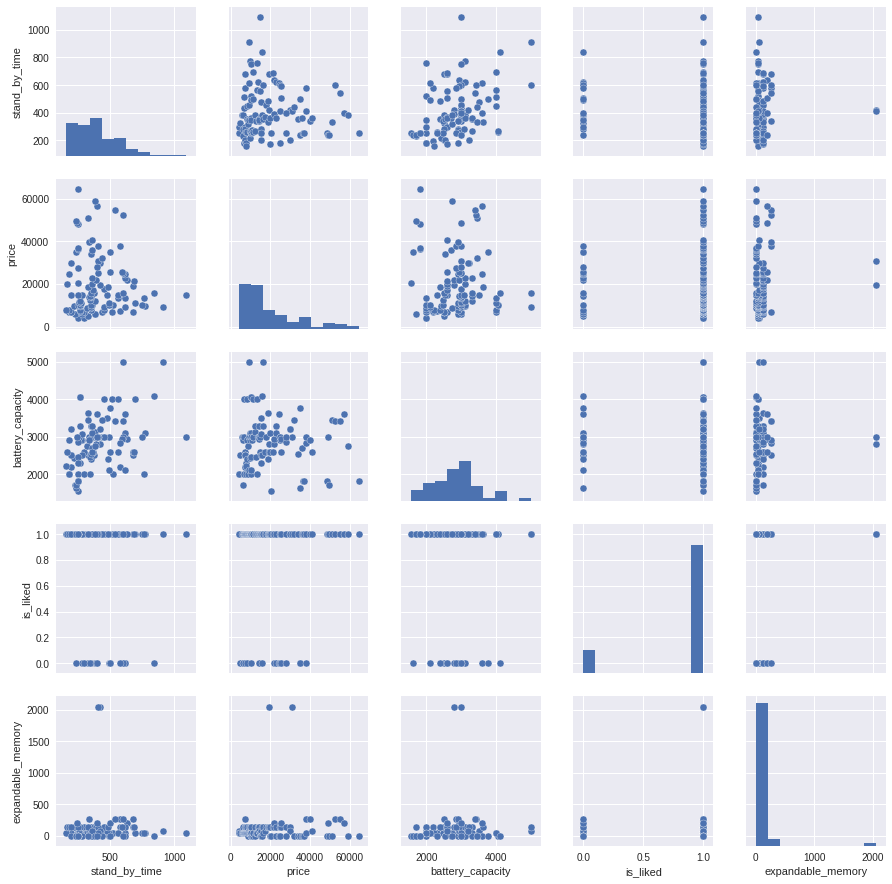

In [0]:
ax= sns.pairplot(df_thin,diag_kind='hist')

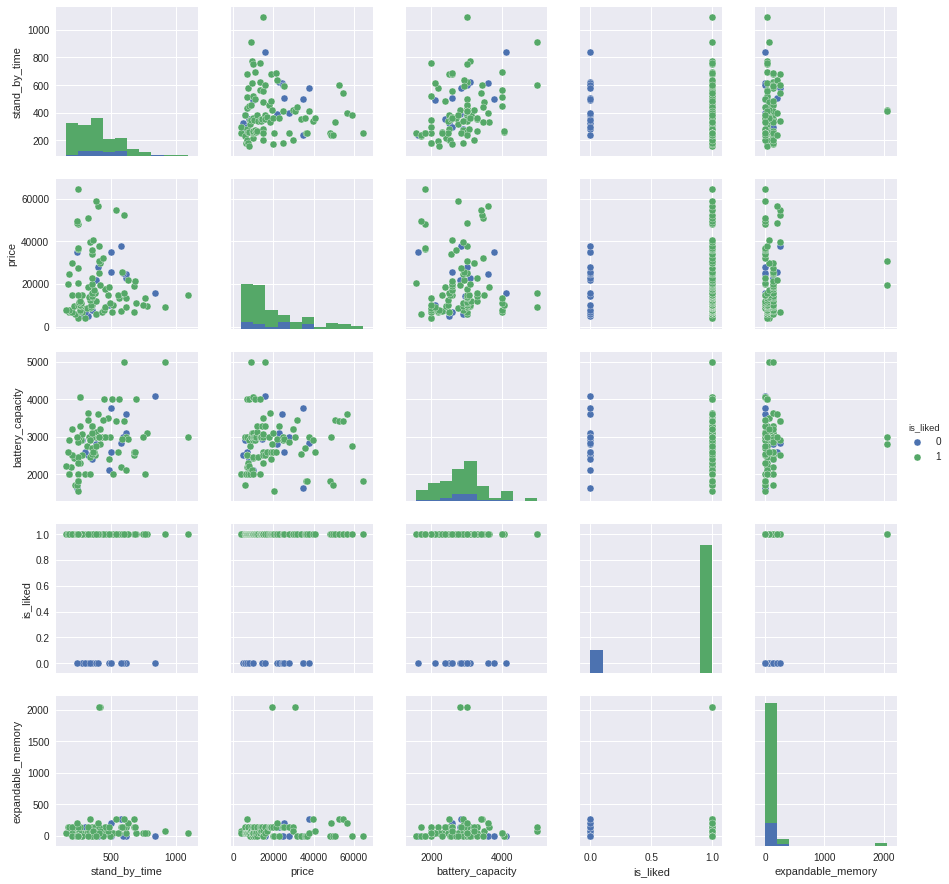

In [0]:
ax= sns.pairplot(df_thin,diag_kind='hist',hue='is_liked') #hue will give another color based on liked phones

# Debugging using pdb:

In [0]:
def factorial(num):
  if num==0:
    return 1
  return num*factorial(num-1)

factorial(5)

120

In [0]:
import random
def code_to_debug():
  for i in range(12):
    x=random.random()
    factorial(x)
code_to_debug()

RecursionError: ignored

In [0]:
import random
def code_to_debug():
  import pdb; pdb.set_trace()
  for i in range(12):
    x=random.random()
    factorial(x)
code_to_debug()

> <ipython-input-68-c305bd5e70fd>(4)code_to_debug()
-> for i in range(12):
(Pdb) n
> <ipython-input-68-c305bd5e70fd>(5)code_to_debug()
-> x=random.random()
(Pdb) n
> <ipython-input-68-c305bd5e70fd>(6)code_to_debug()
-> factorial(x)
(Pdb) s
--Call--
> <ipython-input-61-c4c25d1dbe11>(1)factorial()
-> def factorial(num):
(Pdb) l
  1  ->	def factorial(num):
  2  	  if num==0:
  3  	    return 1
  4  	  return num*factorial(num-1)
  5  	
  6  	factorial(5)
[EOF]
(Pdb) n
> <ipython-input-61-c4c25d1dbe11>(2)factorial()
-> if num==0:
(Pdb) n
> <ipython-input-61-c4c25d1dbe11>(4)factorial()
-> return num*factorial(num-1)
(Pdb) l
  1  	def factorial(num):
  2  	  if num==0:
  3  	    return 1
  4  ->	  return num*factorial(num-1)
  5  	
  6  	factorial(5)
[EOF]
(Pdb) num
0.10706305347430012
(Pdb) n


RecursionError: ignored

**We can set the debugging mode to Verbose as:**

In [0]:
%xmode Verbose

Exception reporting mode: Verbose


In [0]:
import random
def code_to_debug():
  for i in range(12):
    x=random.random()
    factorial(x)
code_to_debug()

RecursionError: ignored

In [0]:
def factorial_debugged(number):
#   import pdb; pdb.set_trace()
  if number<0:
    print('negative number not supported')
    return 'no factorial'
  elif (not isinstance(number,int)):
    print('this method only supports integers')
    return 'no factorial'
  elif number==0:
    return 1
  return number*factorial_debugged(number-1)

factorial_debugged(1.5)

1

In [0]:
import random
def code_to_debug():
#   import pdb; pdb.set_trace()
  for i in range(12):
    x=random.random()
    factorial_debugged(x)
code_to_debug()

this method only supports integers
this method only supports integers
this method only supports integers
this method only supports integers
this method only supports integers
this method only supports integers
this method only supports integers
this method only supports integers
this method only supports integers
this method only supports integers
this method only supports integers
this method only supports integers


negative number not supported


-1

#Plotting Vectors

In [0]:
import numpy as np
import matplotlib.pyplot as plt

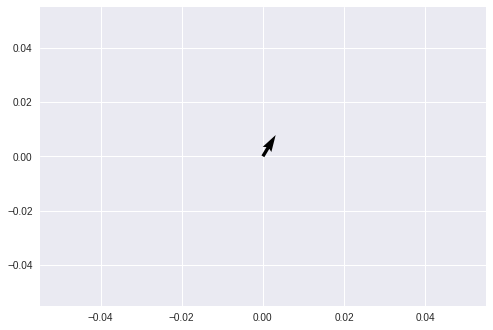

In [0]:
plt.quiver(0,0,3,5);

**To plot vectors in the x-y plane, with u and v having the same units as x and y, use angles='xy', scale_units='xy', scale=1.**

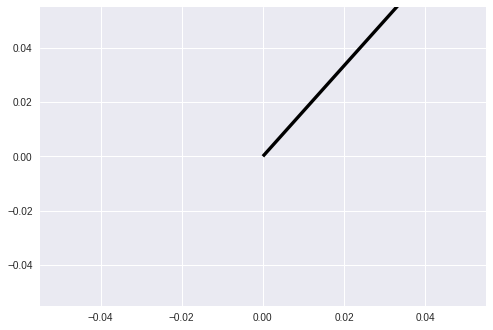

In [0]:
plt.quiver(0,0,3,5,scale_units='xy',angles='xy',scale=1) #now the vector is magnified, but we need to rescale axis:

(-10, 10)

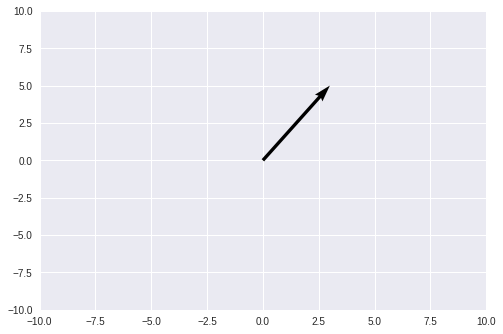

In [0]:
plt.quiver(0,0,3,5,scale_units='xy',angles='xy',scale=1)
plt.xlim(-10,10)
plt.ylim(-10,10)

**To plot multiple vectors:**

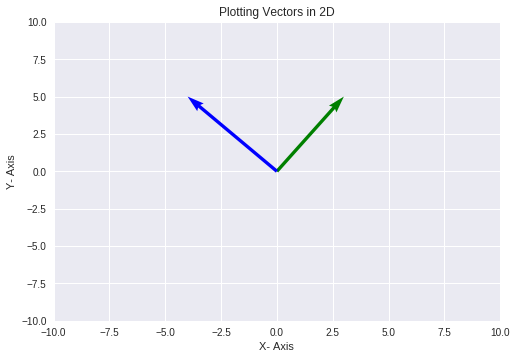

In [0]:
plt.quiver(0,0,3,5,color='green',scale_units='xy',angles='xy',scale=1) 
plt.quiver(0,0,-4,5,color='b',scale_units='xy',angles='xy',scale=1)
plt.xlim(-10,10)
plt.ylim(-10,10)
plt.xlabel('X- Axis')
plt.ylabel('Y- Axis')
plt.title('Plotting Vectors in 2D')
plt.show()

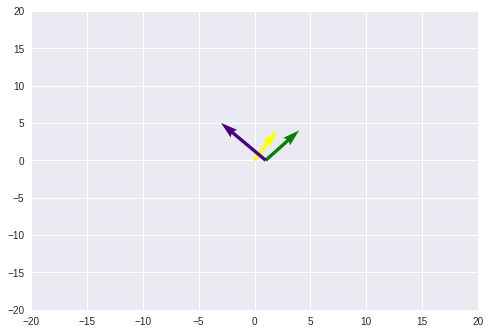

In [0]:
def plot_vectors(vec):
  for i in vec:
    plt.quiver(i[0],i[1],i[2],i[3],
               color=np.random.choice(['r','g','b','yellow','indigo']),
               scale_units='xy',scale=1,angles='xy')
    
list_vectors=[[1,0,3,4],[0,0,2,4],[1,0,-4,5]]
plot_vectors(list_vectors)
plt.xlim(-20,20)
plt.ylim(-20,20)
plt.show()

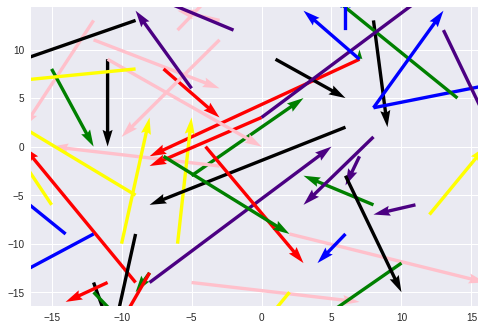

In [0]:
def plot_vectors(mat):
  for i in range(mat.shape[0]):
    plt.quiver(mat[i,0],mat[i,1],mat[i,2],mat[i,3],
               color=np.random.choice(['r','g','b','yellow','indigo','pink','black']),
               scale_units='xy',scale=1,angles='xy')
    
list_vectors=np.random.randint(-15,15,(55,4))
plot_vectors(list_vectors)
# plt.xlim(-30,30)
# plt.ylim(-30,30)
plt.autoscale()
plt.show()

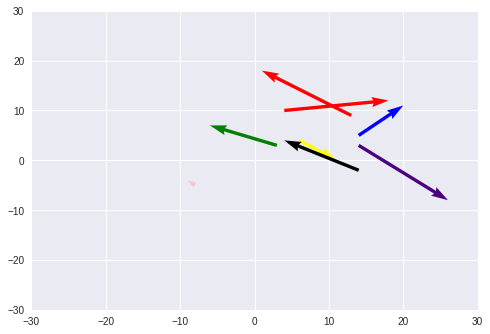

In [0]:
def plot_vectors(mat):
  colors=['r','g','b','yellow','indigo','pink','black']
  col_ind=0
  for i in range(mat.shape[0]):
    plt.quiver(mat[i,0],mat[i,1],mat[i,2],mat[i,3],
               color=colors[col_ind%len(colors)],    #assuring, that each color is cycled
               scale_units='xy',scale=1,angles='xy')
    col_ind+=1
    
list_vectors=np.random.randint(-15,15,(8,4))
plot_vectors(list_vectors)
plt.xlim(-30,30)
plt.ylim(-30,30)
plt.show()

In [0]:
x[0,0]

4

# vector addition and subtraction

In [0]:
def plot_vectors(vecs):
  i=0
  colours=['r','g','b','purple']
  for vec in vecs:
    plt.quiver(vec[0],vec[1],vec[2],vec[3],scale=1,angles='xy',
               color=colours[i%len(colours)],scale_units='xy')
    i+=1
  plt.xlim(-20,20)
  plt.ylim(-20,20);

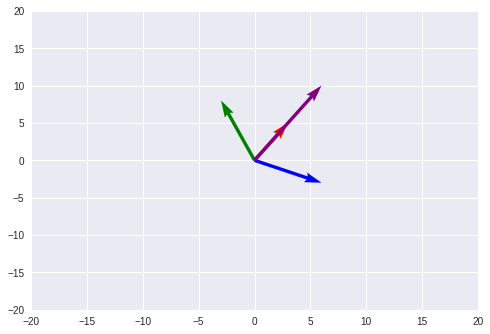

In [0]:
vecs= [np.asarray([0,0,3,5]),np.asarray([0,0,-3,8]),np.array([0,0,6,-3])]
plot_vectors([vecs[0],vecs[1],vecs[2],vecs[0]+vecs[1]+vecs[2]])

**Plotting projection:**

Note: since, the 'u' and 'v' values are 0, therefore the below is correct. We should take the last two values of vectors to calculate projection.

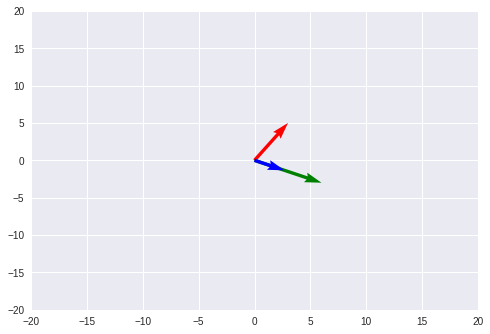

In [0]:
plot_vectors([vecs[0],vecs[2],np.dot(vecs[0],(vecs[2])/np.linalg.norm(vecs[2]))*vecs[2]]) #bettr is taking only 'x' and'y values.

In [0]:
x=np.dot(vecs[0],(vecs[2])/np.linalg.norm(vecs[2]))*vecs[2]  #this is the projection of vecs[0] on vecs[2]

**projecting the projection vector on to the vector:**

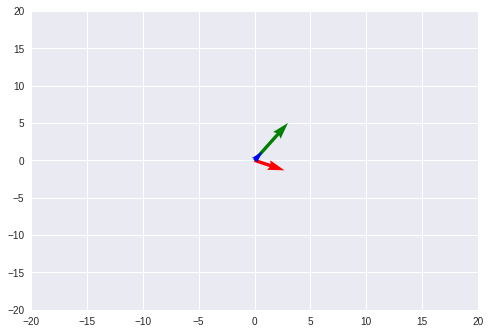

In [0]:
plot_vectors([x,vecs[0],np.dot(vecs[0],x)/np.linalg.norm(vecs[0])*vecs[0]])

 **dot product will tell us, how aligned  the two vectors are, if the angle between the two is small (acute angle), the dot product will be +ve, and for obtuse angle, dot product will be -ve. The magnitude will depend upon these vector's magnitude.**